# Receptor Density - Gene Expression Data


General API guide: http://help.brain-map.org/display/mousebrain/API

General RMA Guide http://help.brain-map.org/pages/viewpage.action?pageId=5308449

Examples RMA URL Queries http://help.brain-map.org/display/api/Example+Queries+for+Experiment+Metadata

Python API Queries https://alleninstitute.github.io/AllenSDK/data_api_client.html

RMA Query Building Web Application http://api.brain-map.org/examples/rma_builder/index.html

### Informatics Data Processing
The informatics data processing pipeline produces results that enable the navigation, analysis and visualization. The pipeline consists of the following components:
- an annotated 3-D reference space,
- an alignment module,
- an expression detection module,
- an expression gridding module, and
- a structure unionizer module.

The output of the pipeline is quantified expression values at a grid voxel level and at a structure level according to the integrated reference atlas ontology. The grid level data are used downstream to provide a differential and correlative gene search service and to support visualization of spatial relationships.

In [1]:
from allensdk.api.queries.rma_api import RmaApi
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rma = RmaApi()

Get experiments for a particular gene - DRD1

In [2]:
# http://api.brain-map.org/api/v2/data/query.xml?criteria=
# model::SectionDataSet
# ,
# rma::criteria,
# products[abbreviation$eqMouse],genes[acronym$eqDrd1]
# ,
# rma::include,
# structure_unionizes
        
data = rma.model_query('SectionDataSet', criteria="products[abbreviation$eq'Mouse'],genes[acronym$eq'Drd1']",
                      include="structure_unionizes")

In [3]:
data_df = pd.DataFrame(data)
data_df

,blue_channel,delegate,expression,failed,failed_facet,green_channel,id,name,plane_of_section_id,qc_date,red_channel,reference_space_id,rnaseq_design_id,section_thickness,specimen_id,sphinx_id,storage_directory,structure_unionizes,weight
0,None,True,True,False,734881840,None,71307280,None,2,2009-05-02T22:56:37Z,None,10,None,25.0,70429761,150678,/external/aibssan/production32/prod334/image_s...,"[{'expression_density': 0.0159272, 'expression...",5470
1,None,False,False,False,734881840,None,352,None,1,None,None,9,None,25.0,702565,78451,/external/mouse/prod1/image_series_352/,"[{'expression_density': 0.0136562, 'expression...",5470
2,None,False,False,False,734881840,None,353,None,2,None,None,10,None,25.0,702529,76510,/external/mouse/prod1/image_series_353/,"[{'expression_density': 0.00817143, 'expressio...",5470
3,None,False,False,False,734881840,None,354,None,2,None,None,10,None,25.0,702473,95220,/external/mouse/prod0/image_series_354/,"[{'expression_density': 7.11597e-05, 'expressi...",5270


In [4]:
experiment_id = 353
param = 'expression_energy'

In [5]:
exp_union_data = pd.DataFrame(data_df[data_df['id']==experiment_id]['structure_unionizes'].item())
exp_union_data

,expression_density,expression_energy,id,section_data_set_id,structure_id,sum_expressing_pixel_intensity,sum_expressing_pixels,sum_pixel_intensity,sum_pixels,voxel_energy_cv,voxel_energy_mean
0,0.008171,1.097120,398484594,353,15564,1.247590e+09,9.292150e+06,2.520100e+10,1.137150e+09,2.657610,1.096010
1,0.008171,1.097120,398484597,353,15565,1.247590e+09,9.292150e+06,2.520100e+10,1.137150e+09,2.657610,1.096010
2,0.010952,1.481770,398484604,353,15566,1.148940e+09,8.491790e+06,1.678110e+10,7.753830e+08,2.328170,1.481180
3,0.012336,1.672050,398484612,353,15567,1.135570e+09,8.378020e+06,1.474800e+10,6.791490e+08,2.180090,1.671290
4,0.000695,0.087989,398484614,353,15568,2.630740e+06,2.077070e+04,4.662790e+08,2.989850e+07,2.344180,0.087989
5,0.001059,0.145861,398484620,353,15569,1.479180e+06,1.073540e+04,1.681380e+08,1.014100e+07,2.264320,0.145861
6,0.000004,0.000541,398484629,353,15570,9.465290e+01,7.650910e-01,2.560660e+06,1.748450e+05,0.657647,0.000541
7,0.001077,0.148410,398484633,353,15576,1.479080e+06,1.073460e+04,1.655780e+08,9.966160e+06,2.241100,0.148410
8,0.001017,0.138655,398484640,353,15577,1.158820e+06,8.497040e+03,1.393510e+08,8.357590e+06,2.129420,0.138655
9,0.000154,0.018406,398484646,353,15578,1.480330e+04,1.241880e+02,1.297410e+07,8.042870e+05,3.164100,0.018406


In [6]:
newdf = exp_union_data[exp_union_data[param] > 10]

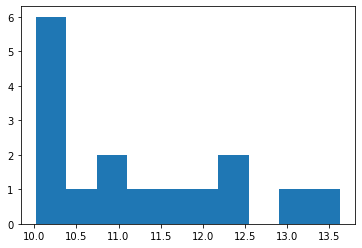

In [7]:
plt.hist(newdf[param])
plt.show()

In [8]:
len(newdf['structure_id'].unique())

16

In [9]:
newdf['structure_id'].unique()[0]
newdf[newdf['structure_id']==15850][param]

211    11.2447
Name: expression_energy, dtype: float64

In [10]:
for s_id in newdf['structure_id'].unique():
    structure = rma.model_query('StructureLookup', criteria="structure[id$eq"+str(s_id)+"]",include="structure")[0]
    print(structure['structure']['name'],'--',structure['structure']['acronym'],'--',param,'=',newdf[newdf['structure_id']==s_id][param].item())

pallidal islands of Calleja -- ICjPal -- expression_energy = 11.2447
intermediate stratum of Str -- Stri -- expression_energy = 10.0175
putamen -- Put -- expression_energy = 10.5275
bed nucleus of the external capsule -- BEC -- expression_energy = 10.2622
intermediate stratum of LPrP -- LPrPi -- expression_energy = 10.0519
claustrum -- Cl -- expression_energy = 10.0519
sublayer 6a of InsCx -- InsC-6a -- expression_energy = 12.0929
sublayer 6b of InsCx -- InsC-6b -- expression_energy = 11.0176
Primary somatosensory area, mouth, layer 6b -- SSp-m6b -- expression_energy = 12.5044
Claustrum -- CLA -- expression_energy = 11.6009
Gustatory areas, layer 6b -- GU6b -- expression_energy = 10.8051
Agranular insular area, ventral part, layer 6a -- AIv6a -- expression_energy = 10.2353
Agranular insular area, ventral part, layer 5 -- AIv5 -- expression_energy = 13.6308
Visceral area, layer 6b -- VISC6b -- expression_energy = 12.46
Supplemental somatosensory area, layer 6b -- SSs6b -- expression_ene